# Yukawa Friedel-Tail

Testing out the Yukawa Friedel Tail potential

The YAML input file can be found [here](./input_files/C_rho5_T1ev_yft.yaml).


---
## Simulation

In Jupyter notebook you can run the following commands

In [1]:
# Import the usual libraries
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import os

plt.style.use('MSUstyle')

# Import sarkas
from sarkas.processes import PreProcess, Simulation, PostProcess

In [2]:
# Create the file path to the YAML input file
input_file_name = os.path.join('input_files', 'Al_rho2.7_T1eV_yft.yaml')

In [3]:
# pre = PreProcess(input_file_name)
# pre.setup(read_yaml=True)
# pre.run()

In [4]:
# sim = Simulation(input_file_name)
# sim.setup(read_yaml=True)
# sim.run()

## Postprocessing

Now that our simulation is complete we need to check if the simulation was physically sound. 
The following lines which will initialize the `PostProcess` class and read the parameters of the simulation.

In [5]:
# Initialize the Postprocessing class
postproc = PostProcess(input_file_name)
# Read the simulation's parameters and assign attributes
postproc.setup(read_yaml=True)

Let's check the temperature and energy

In [6]:
from sarkas.tools.observables import RadialDistributionFunction, Thermodynamics



=========================== Thermodynamics ===========================
Data saved in: 
 SarkasSimulations/Al_rho2.7_T1eV_yft/PostProcessing/Thermodynamics/Production/Thermodynamics_Al_rho2.7_T1eV_yft.h5
Data accessible via: self.dataframe_slices, self.dataframe

Time Series Data:
No. of blocks = 1
No. dumps per block = 101
Total time per block: T = 5.0005e-13 [s] ~ 15 plasma periods
Time interval: dt = 5.0000e-15 [s] ~ 1.5e-01 plasma period



Thermodynamics calculation Time: 0 sec 153 msec 702 usec 875 nsec


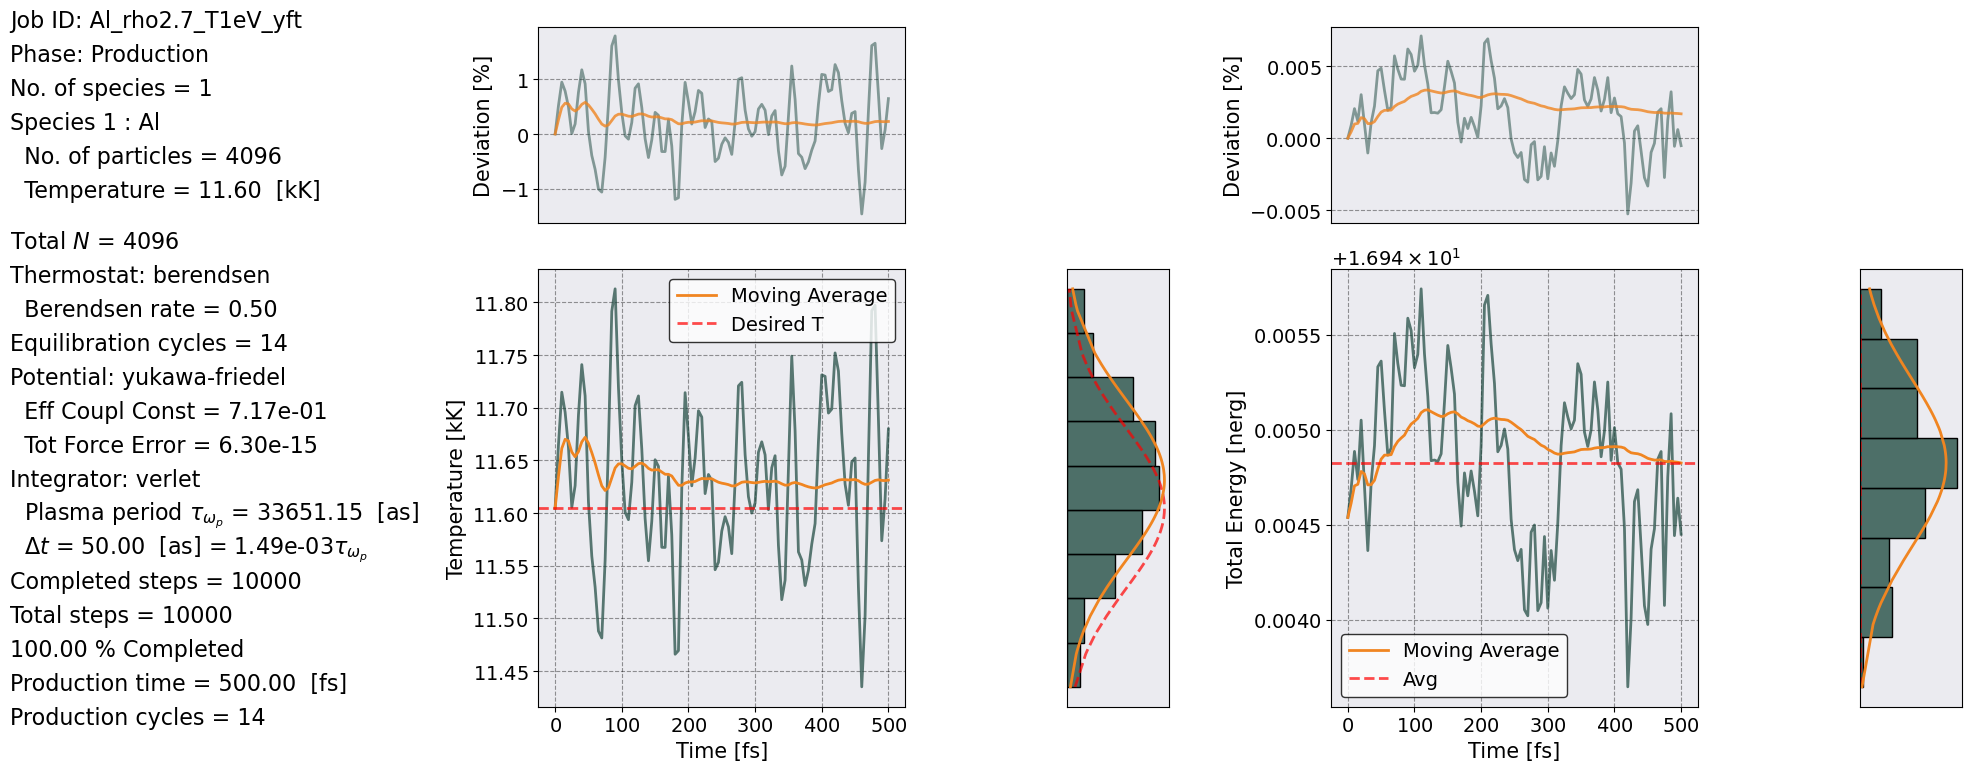

In [7]:
therm = Thermodynamics()
therm.setup(postproc.parameters, phase = "production")
therm.read_data_from_dumps()
therm.compute()
therm.temp_energy_plot(postproc)

Noice! The temperature (left plots) and total energy (plots on the right) are both conserved in the production phase. They do oscillate widly, but this is fine as long as the deviation percentages are within an accepted range. 

The deviation percentages (top plots) are calculated as

$$\Delta T(t) = \frac{T(t) - T_{\rm desired}}{T_{\rm desired}}, \quad \Delta E = \frac{E(t) - E(t = 0)}{E(t = 0)}. $$ 

___
## Observables

The most common observable is the radial distribution function, _i.e._ $g(r)$. This can be calculated using the following code.

In [8]:
rdf = RadialDistributionFunction()
rdf.setup(postproc.parameters)
rdf.compute()



==================== Radial Distribution Function ====================
Data saved in: 
 SarkasSimulations/Al_rho2.7_T1eV_yft/PostProcessing/RadialDistributionFunction/Production/RadialDistributionFunction_Al_rho2.7_T1eV_yft.h5
Data accessible via: self.dataframe_slices, self.dataframe
No. bins = 250
dr = 0.0253 a_ws = 4.0000e-10 [cm]
Maximum Distance (i.e. potential.rc)= 6.3212 a_ws = 1.0000e-07 [cm]
Time Series Data:
No. of blocks = 1
No. dumps per block = 101
Total time per block: T = 5.0005e-13 [s] ~ 15 plasma periods
Time interval: dt = 5.0000e-15 [s] ~ 1.5e-01 plasma period


Calculating RDF for slice:   0%|          | 0/1 [00:00<?, ?it/s]


Radial Distribution Function Calculation Time: 0 sec 21 msec 151 usec 83 nsec


In [9]:
# Let's look at the data 
rdf.dataframe.head()

Interparticle Al-Al RDF    
       Distance      Mean Std
0  0.000000e+00       0.0 NaN
1  6.000000e-10       0.0 NaN
2  1.000000e-09       0.0 NaN
3  1.400000e-09       0.0 NaN
4  1.800000e-09       0.0 NaN

In [10]:
# Read webplotdigitez data of Fig. 9a of YFT paper.
data = np.loadtxt('input_files/Al_paper_data_gr.csv', delimiter = ',')
data[:5]

array([[1.08152174, 0.01800709],
       [1.13460566, 0.06244169],
       [1.15735592, 0.08658332],
       [1.17328109, 0.12946845],
       [1.19148129, 0.18198358]])

The RDF is computed and stored in a `pandas.DataFrame`. The columns `Mean` and `Std` refer to the subdivision of the simulation data. We will explain this in another notebook. For now let's make a plot.

[Text(0.5, 1.0, 'Al $\\rho = 2.7$ g/cc at T = 1 eV')]

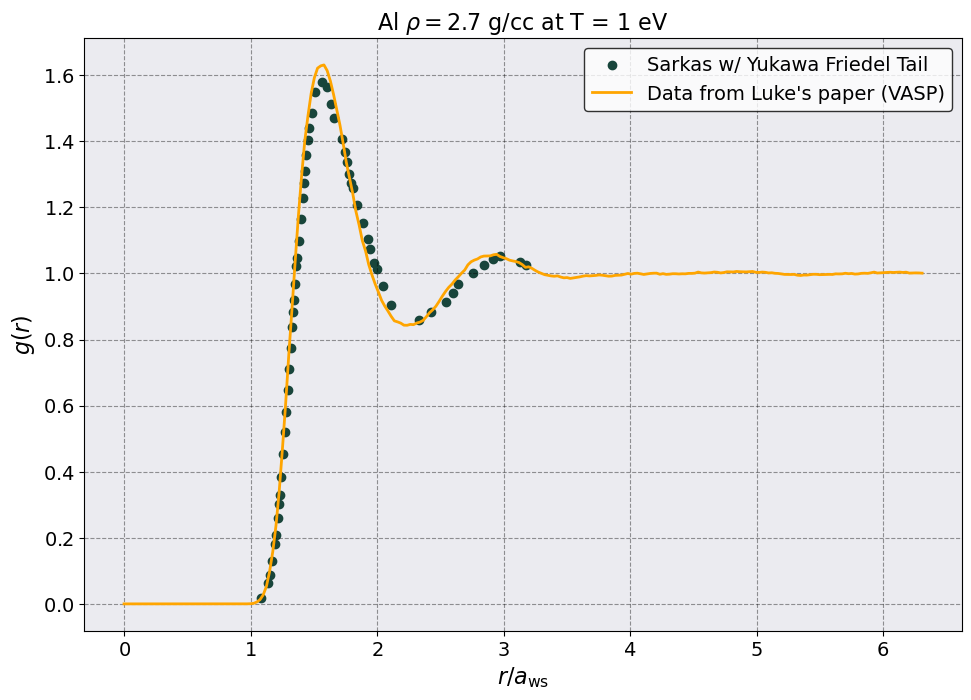

In [11]:
# Let's make a plot
fig, ax = plt.subplots(1,1)
ax.scatter(data[:,0], data[:,1], label = 'Data')
ax = rdf.plot(
    scaling=rdf.a_ws,
    y = [("Al-Al RDF", "Mean")],
    xlabel = r'$r/a_{\rm ws}$',
    ylabel = r'$g(r)$',
    color = 'orange',
    ax = ax
)
ax.legend(["Sarkas w/ Yukawa Friedel Tail", "Data from Luke's paper (VASP)"])
ax.set(title = r"Al $\rho = 2.7$ g/cc at T = 1 eV")

Good agreement. Differences might due to the misalignment of the image in webplotdigitiz

In [42]:
from sarkas.tools.observables import VelocityAutoCorrelationFunction

vacf = VelocityAutoCorrelationFunction()
vacf.setup(postproc.parameters, no_ptcls_per_species = 1024,phase = "production")
vacf.compute_acf()



================= Velocity AutoCorrelation Function ==================
Data saved in: 
 SarkasSimulations/Al_rho2.7_T1eV_yft/PostProcessing/VelocityAutoCorrelationFunction/Production/VelocityAutoCorrelationFunction_Al_rho2.7_T1eV_yft.h5
Data accessible via: self.dataframe_slices, self.dataframe

Time Series Data:
No. of blocks = 1
No. dumps per block = 101
Total time per block: T = 5.0005e-13 [s] ~ 15 plasma periods
Time interval: dt = 5.0000e-15 [s] ~ 1.5e-01 plasma period



Calculating Velocity AutoCorrelation Function for slice :   0%|          | 0/1 [00:00<?, ?it/s]


Velocity AutoCorrelation Function Calculation Time: 0 sec 212 msec 828 usec 42 nsec


In [43]:
vacf.simulation_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Columns: 3001 entries, ('Species', 'Particle', 'Time') to ('Al', '999', 'Z')
dtypes: float64(3001)
memory usage: 2.3 MB




======================= Diffusion Coefficients =======================
Data saved in: 
 SarkasSimulations/Al_rho2.7_T1eV_yft/PostProcessing/TransportCoefficients/Diffusion/Production/Diffusion_Al_rho2.7_T1eV_yft.h5 
 SarkasSimulations/Al_rho2.7_T1eV_yft/PostProcessing/TransportCoefficients/Diffusion/Production/Diffusion_slices_Al_rho2.7_T1eV_yft.h5 
No. of slices = 1
No. dumps per block = 101
Total time interval of autocorrelation function: tau = 5.0500e-13 [s] ~ 15 plasma periods
Time interval step: dtau = 5.0000e-15 ~ 1.4858e-01 plasma periods


  0%|          | 0/1 [00:00<?, ?it/s]


Diffusion Calculation Time: 0 sec 4 msec 804 usec 708 nsec


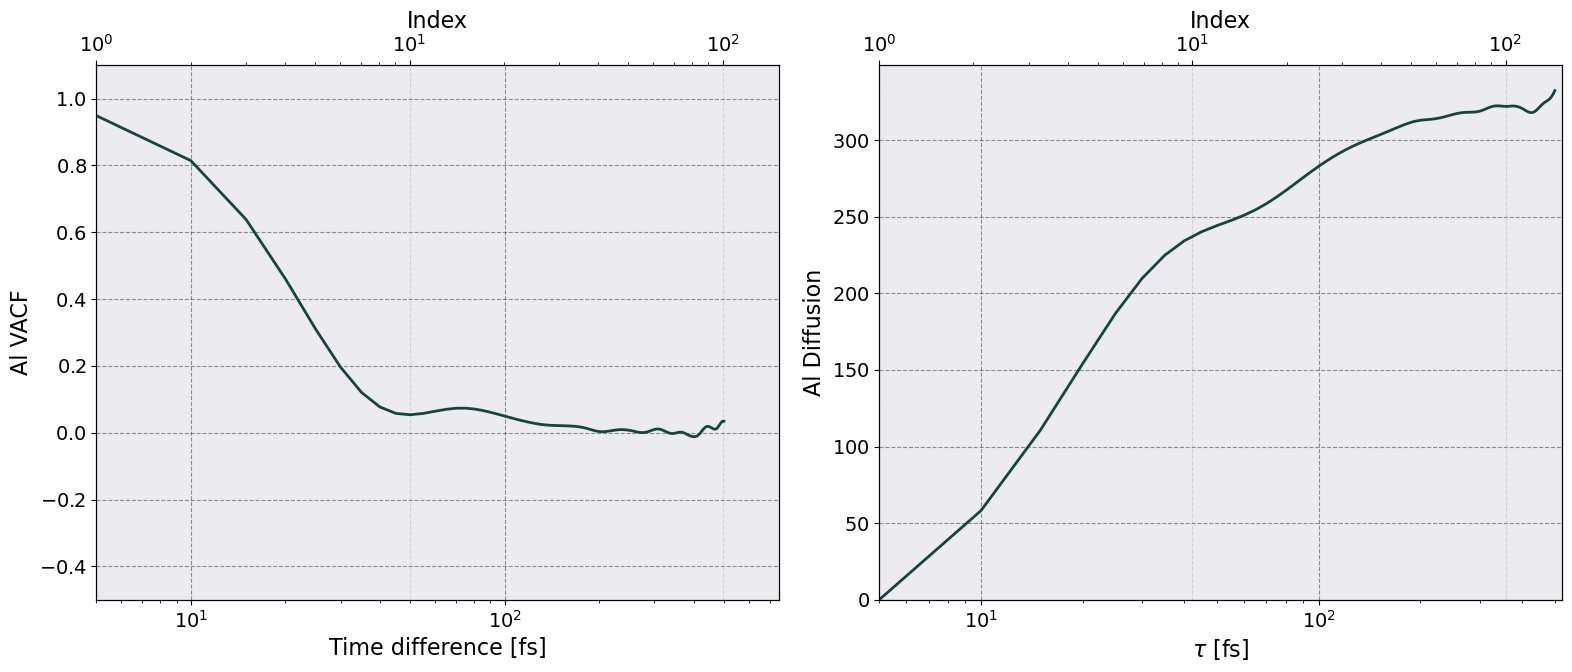

In [44]:
from sarkas.tools.transport import Diffusion 

diff = Diffusion()
diff.setup(postproc.parameters, vacf, therm)
diff.compute(vacf)

In [29]:
diff.dataframe_slices.head()

Integration Al Diffusion          
       Interval      slice 0   slice 1
0  0.000000e+00     0.000000  0.000000
1  5.000000e-15     0.000000  0.000000
2  1.000000e-14     0.000061  0.000057
3  1.500000e-14     0.000116  0.000110
4  2.000000e-14     0.000161  0.000153